# Imports

In [169]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

# Definitions

In [170]:
img_file = (
    "/Users/richardcollins/palette-able-images/data/test_images/Emma.png"
)

# Functions

In [171]:
def resize_image_cv2(img_file, dims):
    img = cv2.imread(img_file)
    print("Original Dimensions: {}".format(img.shape))
    resized = cv2.resize(img, dims, interpolation=cv2.INTER_AREA)
    print("Resized Dimensions: {}".format(resized.shape))
    return resized


def resize_image_pillow(img, dims):
    print("Original Dimensions: {}".format(img.size))
    resized = img.resize(dims)
    print("Resized Dimensions: {}".format(resized.size))
    return resized


def reduce_colours(img, nColours):
    image_pbn = img.convert("P", palette=Image.ADAPTIVE, colors=nColours)
    # image_pbn.save("/Users/richardcollins/Desktop/jonny/images/jonny_cropped_resized_pbn.png")
    # image_pbn.show()
    return image_pbn


def get_palette_info(img):
    palette_colours = img.getcolors()
    # print(palette_colours)
    imgRGB = img.convert("RGB")
    rgb_colours = imgRGB.getcolors()
    # print(rgb_colours)
    palette_info_dict = {c: [] for c in ["colourID", "frequency", "r", "g", "b"]}
    for palette_freq, palette_colour in palette_colours:
        for rgb_freq, rgb_colour in rgb_colours:
            if palette_freq != rgb_freq:
                continue

            palette_info_dict["colourID"].append(palette_colour)
            palette_info_dict["frequency"].append(rgb_freq)
            for i, colour in enumerate(["r", "g", "b"]):
                palette_info_dict[colour].append(rgb_colour[i])
    palette_info_df = pd.DataFrame(palette_info_dict)
    ### Generate example images
    """w, h = 512, 512
    for palette_colour, rgb_colour in palette_info.items():
        r, g, b = rgb_colour[0], rgb_colour[1], rgb_colour[2]
        data = np.zeros((h, w, 3), dtype=np.uint8)
        data[:, :] = [r, g, b]  # red patch in upper left
        img = Image.fromarray(data, "RGB")
        img.save(
            "/Users/richardcollins/Desktop/jonny/images/palette/colour{0}_rgb{1}.png".format(
                palette_colour, rgb_colour
            )
        )"""
    return palette_info_df


def quantise_to_palette(img, palette):
    """Quantize image to a given palette.

    The input image is expected to be a PIL Image.
    The palette is expected to be a list of no more than 256 R,G,B values."""

    e = len(palette)
    assert e > 0, "Palette unexpectedly short"
    assert e <= 768, "Palette unexpectedly long"
    assert e % 3 == 0, "Palette not multiple of 3, so not RGB"

    # Make tiny, 1x1 new palette image
    p = Image.new("P", (1, 1))

    # Zero-pad the palette to 256 RGB colours, i.e. 768 values and apply to image
    palette += (768 - e) * [0]
    p.putpalette(palette)

    # Now quantize input image to the same palette as our little image
    return img.convert("RGB").quantize(palette=p)

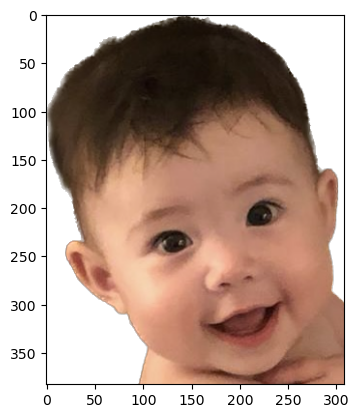

In [172]:
original = Image.open(img_file)
plt.imshow(original)
plt.show()

In [173]:
resized = resize_image_pillow(img=original, dims=(80, 100))

Original Dimensions: (308, 383)
Resized Dimensions: (80, 100)


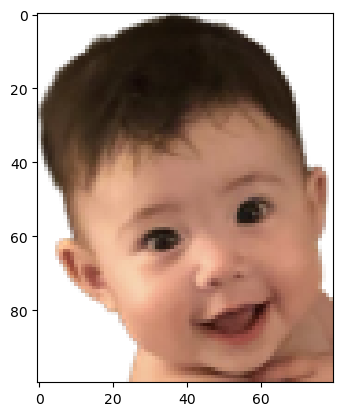

In [174]:
plt.imshow(resized)
plt.show()

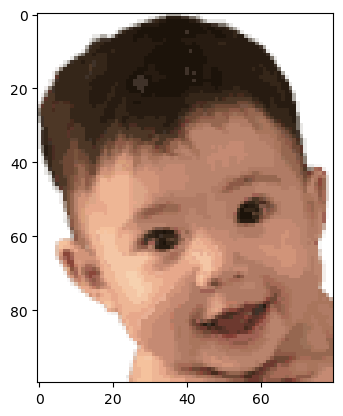

In [175]:
image_pbn = reduce_colours(img=resized, nColours=60)
plt.imshow(image_pbn)
plt.show()

In [176]:
get_palette_info(img=image_pbn).sort_values("frequency", ascending=False)

,colourID,frequency,r,g,b
76,34,1677,0,0,0
77,35,698,176,122,100
78,36,663,38,26,16
79,37,653,185,132,108
80,38,487,197,138,114
...,...,...,...,...,...
56,28,2,208,155,131
72,32,1,153,153,153
73,32,1,204,204,153
74,33,1,153,153,153


In [177]:
np.array(image_pbn.getpalette()).reshape(256,3)

array([[ 44,  29,  19],
       [ 51,  38,  23],
       [157,  94,  80],
       [232, 172, 144],
       [ 49,  37,  22],
       [ 82,  43,  31],
       [ 47,  34,  20],
       [121,  85,  68],
       [ 91,  65,  47],
       [ 78,  51,  38],
       [246, 209, 175],
       [215, 159, 122],
       [194, 125, 101],
       [119,  93,  82],
       [153, 115,  94],
       [173, 135, 107],
       [ 68,  50,  32],
       [157, 118,  98],
       [204, 152, 119],
       [136,  83,  61],
       [ 75,  54,  38],
       [214, 162, 132],
       [166, 119,  95],
       [106,  73,  53],
       [105,  91,  54],
       [181, 137, 112],
       [185, 136, 111],
       [177, 128, 100],
       [208, 155, 131],
       [130,  60,  52],
       [198, 152, 120],
       [ 97,  67,  48],
       [153, 153, 153],
       [204, 204, 153],
       [  0,   0,   0],
       [176, 122, 100],
       [ 38,  26,  16],
       [185, 132, 108],
       [197, 138, 114],
       [ 52,  37,  24],
       [ 28,  19,  10],
       [150, 103

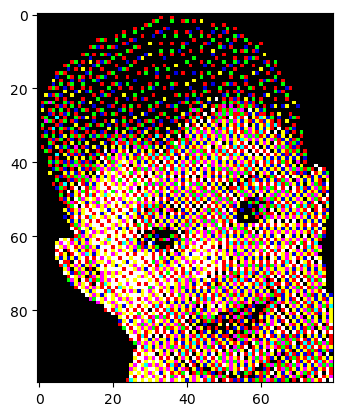

In [178]:
new_palette = list(
    np.array([[0, 0, 0], [0, 0, 225], [0, 255, 0], [255, 0, 0], [0, 255, 255], [255, 0, 255], [255, 255, 0], [255, 255, 255]]).flatten()
)
image_new_palette = quantise_to_palette(img=resized, palette=new_palette)
plt.imshow(image_new_palette)
plt.show()

In [179]:
get_palette_info(img=image_new_palette)

,colourID,frequency,r,g,b
0,0,3284,0,0,0
1,1,592,0,0,225
2,2,463,0,255,0
3,3,1097,255,0,0
4,4,152,0,255,255
5,5,557,255,0,255
6,6,1126,255,255,0
7,7,729,255,255,255


In [180]:
pd.DataFrame(np.array(image_new_palette))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,5,6,1,6,1,6,5,2,5,2
96,0,0,0,0,0,0,0,0,0,0,...,1,6,5,6,3,1,6,3,7,3
97,0,0,0,0,0,0,0,0,0,0,...,6,5,2,3,4,3,7,0,7,3
98,0,0,0,0,0,0,0,0,0,0,...,2,3,0,5,6,0,7,3,6,5
